# Student Performance Indicator  

## Life Cycle of Machine Learning Project  
- Understanding the Problem Statement  
- Data Collection  
- Data Checks to Perform  
- Exploratory Data Analysis  
- Data Pre-Processing  
- Model Training  
- Choose Best Model  

## 1. Problem Statement  
This project understands how the student's performance (test scores) is affected by other variables such as:  
- Gender  
- Ethnicity  
- Parental level of education  
- Lunch  
- Test preparation course  

## 2. Data Collection  
- **Dataset Source**: [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)  
- **Data Overview**:  
  - 8 columns  
  - 1000 rows  

### 2.1 Import Data and Required Packages  
Importing the following libraries:  
- Pandas: For data manipulation and analysis.  
- NumPy: For numerical computations.  
- Matplotlib: For data visualization.  
- Seaborn: For statistical data visualization.  
- Warnings: To suppress warnings.  


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [27]:
df = pd.read_csv('data/raw.csv')

Show Top 5 Records

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,male,group A,master's degree,free/reduced,none,67,70,99
1,male,group E,some high school,standard,none,59,99,39
2,male,group B,some college,standard,none,51,46,49
3,male,group B,master's degree,standard,none,53,96,62
4,male,group E,some college,standard,none,83,73,73


Shape of the dataset

In [29]:
df.shape

(200, 8)

### 2.2 Dataset Information

- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's - degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score


## 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [30]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_prep_course               0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

### 3.2 Check Duplicates

In [32]:
print(df.duplicated().sum())

0


There are no duplicates values in the data set

### 3.3 Check data types

In [33]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       200 non-null    object
 1   race_ethnicity               200 non-null    object
 2   parental_level_of_education  200 non-null    object
 3   lunch                        200 non-null    object
 4   test_prep_course             200 non-null    object
 5   math_score                   200 non-null    int64 
 6   reading_score                200 non-null    int64 
 7   writing_score                200 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.6+ KB


### 3.4 Checking the number of unique values of each column

In [34]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_prep_course                2
math_score                     69
reading_score                  69
writing_score                  65
dtype: int64

### 3.5 Check statistics of data set

In [35]:
df.describe()

,math_score,reading_score,writing_score
count,200.000000,200.000000,200.000000
mean,63.305000,64.140000,67.445000
std,19.916963,19.908343,20.641885
min,30.000000,30.000000,30.000000
25%,46.000000,49.000000,49.000000
50%,62.500000,64.000000,69.000000
75%,81.000000,80.000000,85.000000
max,100.000000,100.000000,100.000000


Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [36]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,male,group A,master's degree,free/reduced,none,67,70,99
1,male,group E,some high school,standard,none,59,99,39
2,male,group B,some college,standard,none,51,46,49
3,male,group B,master's degree,standard,none,53,96,62
4,male,group E,some college,standard,none,83,73,73


In [45]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_prep_course'].unique())

# print("Categories in 'math score' variable:     ", end=" ")
# print(df['math_score'].unique())

# print("Categories in 'reading score' variable:     ", end=" ")
# print(df['reading_score'].unique())

# print("Categories in 'writing score' variable:     ", end=" ")
# print(df['writing_score'].unique())



Categories in 'gender' variable:      ['male' 'female']
Categories in 'race_ethnicity' variable:   ['group A' 'group E' 'group B' 'group D' 'group C']
Categories in'parental level of education' variable: ["master's degree" 'some high school' 'some college' "bachelor's degree"
 "associate's degree" 'high school']
Categories in 'lunch' variable:      ['free/reduced' 'standard']
Categories in 'test preparation course' variable:      ['none' 'complete']


In [46]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_prep_course']


In [47]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,male,group A,master's degree,free/reduced,none,67,70,99
1,male,group E,some high school,standard,none,59,99,39


### 3.8 Adding columns for "Total Score" and "Average"

In [48]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score,total score,average
0,male,group A,master's degree,free/reduced,none,67,70,99,236,78.666667
1,male,group E,some high school,standard,none,59,99,39,197,65.666667
2,male,group B,some college,standard,none,51,46,49,146,48.666667
3,male,group B,master's degree,standard,none,53,96,62,211,70.333333
4,male,group E,some college,standard,none,83,73,73,229,76.333333


In [49]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 2
Number of students with full marks in Writing: 5
Number of students with full marks in Reading: 2


In [50]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 0
Number of students with less than 20 marks in Writing: 0
Number of students with less than 20 marks in Reading: 0


Insights
- From above values we get students have performed the worst in Maths
- Best performance is in reading section

## 4. Exploring Data ( Visualization )
### 4.1 Visualize average score distribution to make some conclusion.
- Histogram
- Kernel Distribution Function (KDE)

### 4.1.1 Histogram & KDE

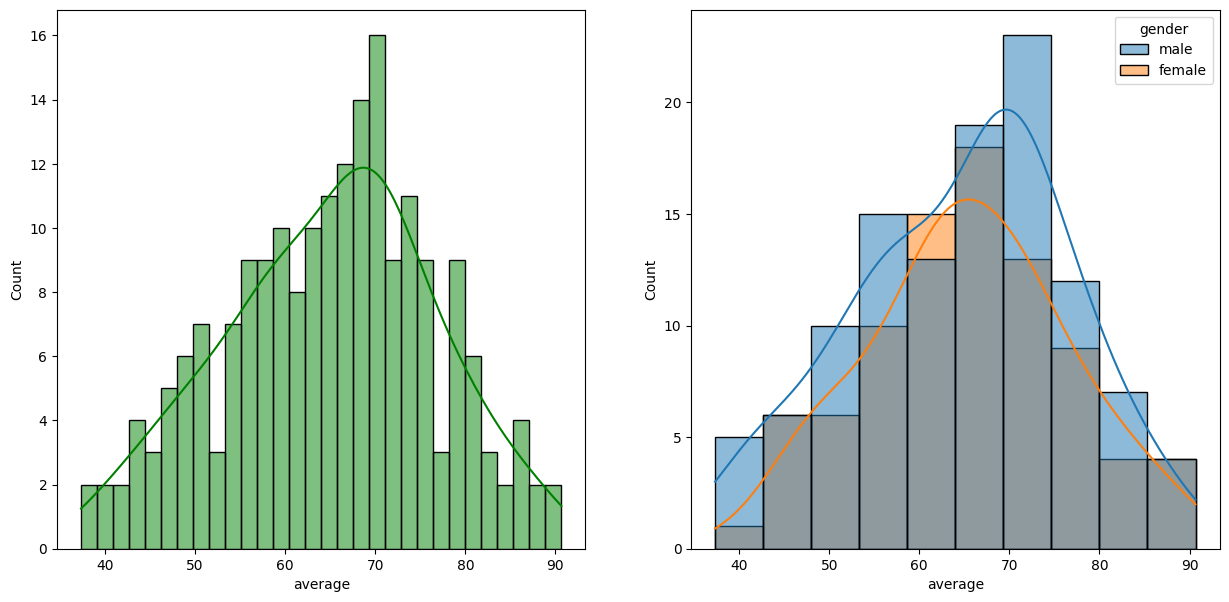

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

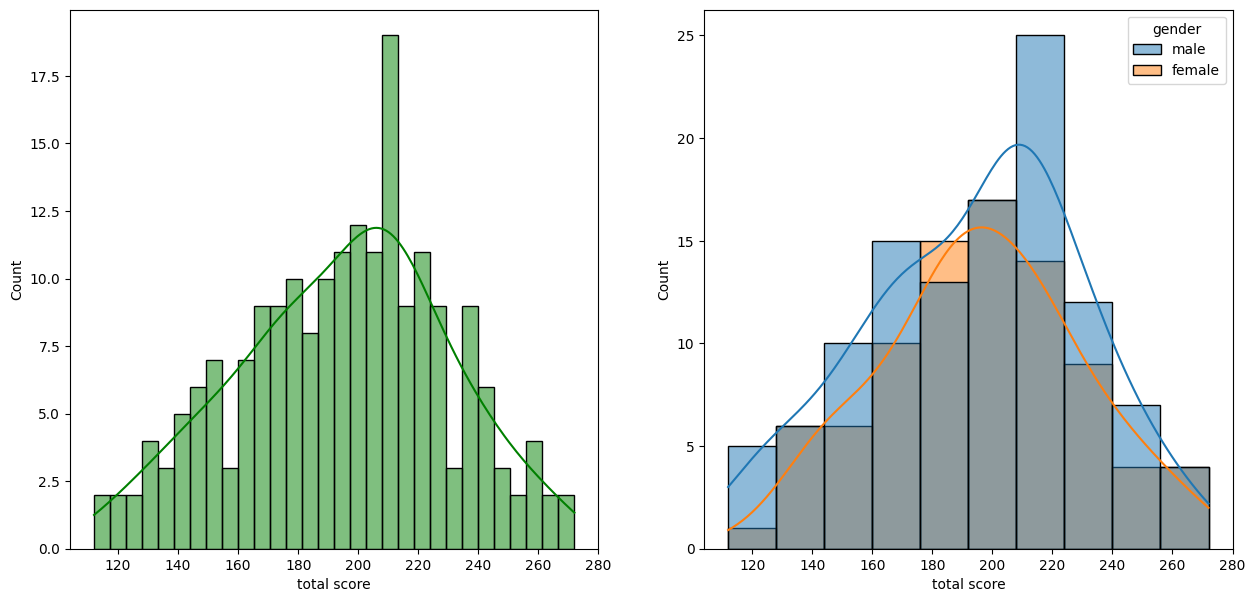

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights
- male students tend to perform well then female students.

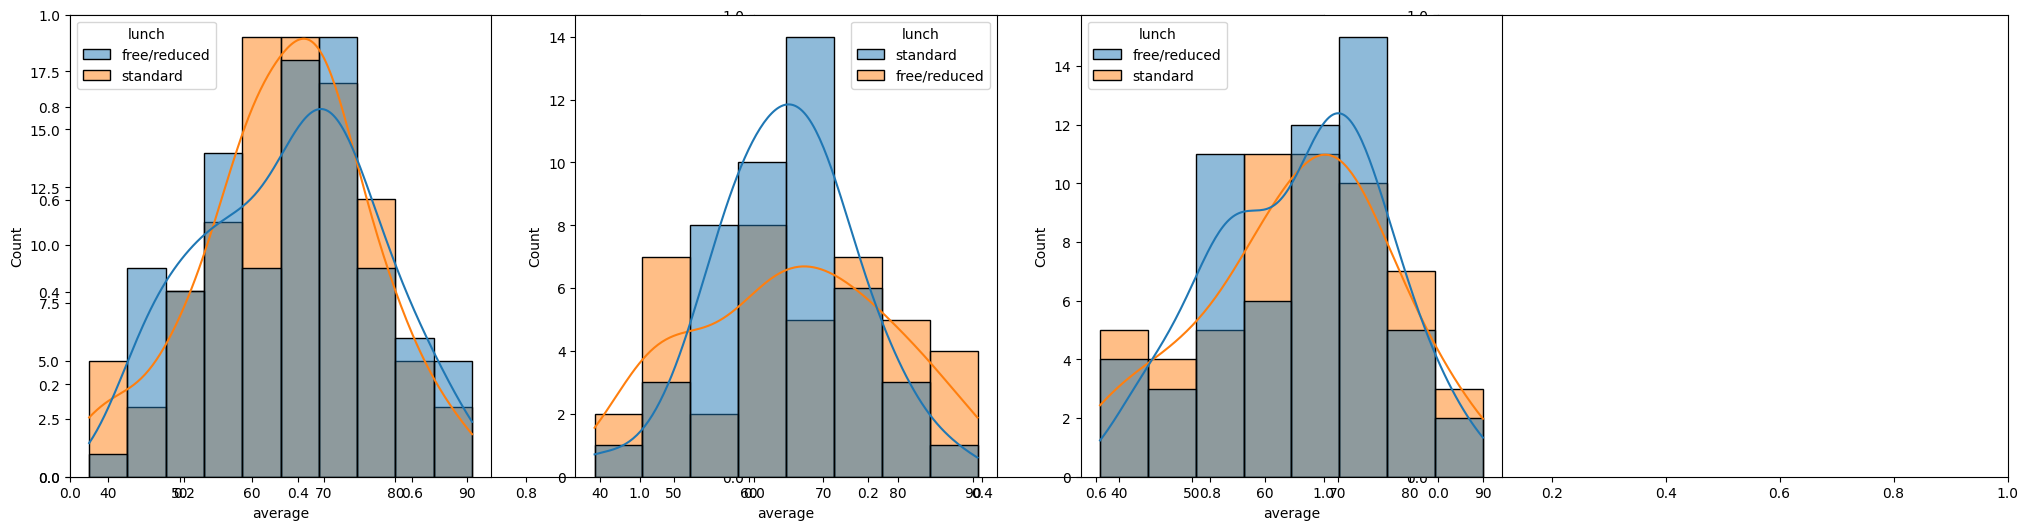

In [53]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

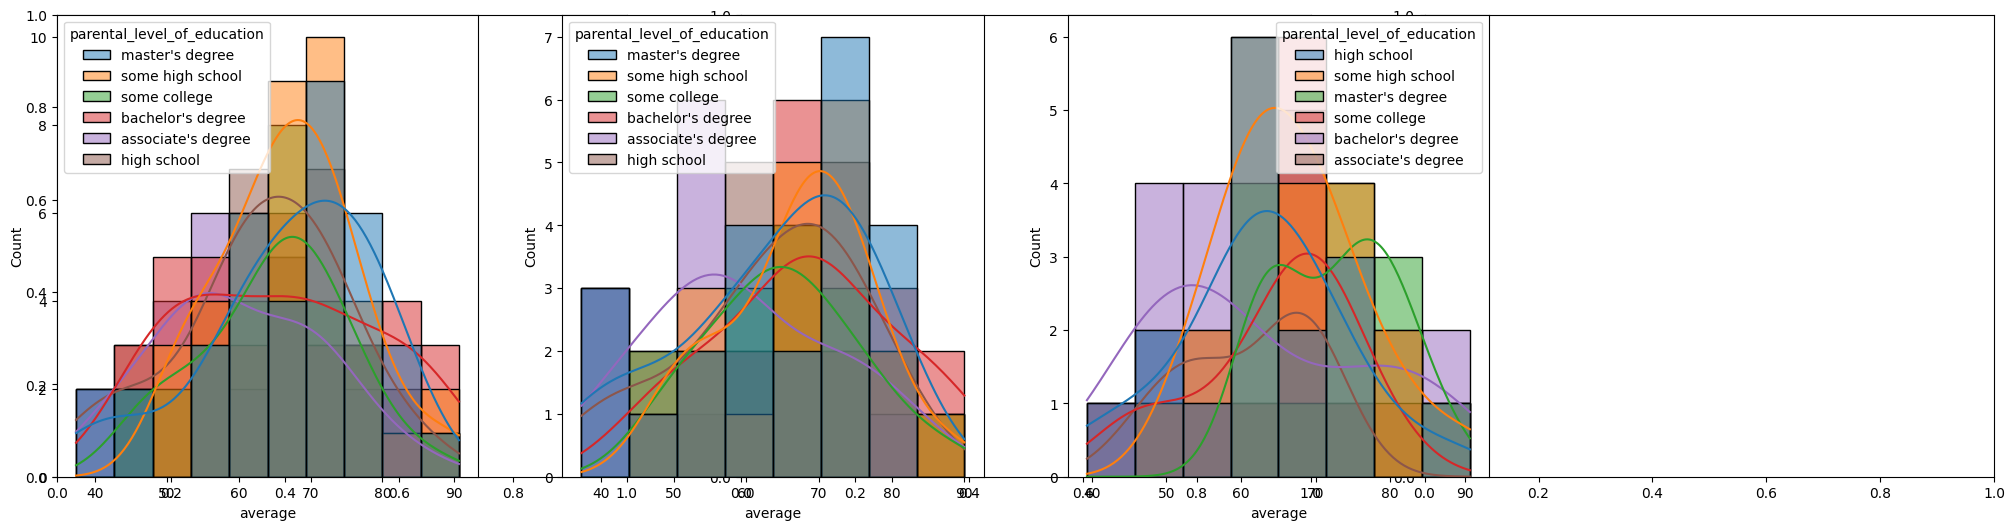

In [60]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

plt.subplot(142)
ax = sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='parental_level_of_education')

plt.subplot(143)
ax = sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='parental_level_of_education')

plt.show()


Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

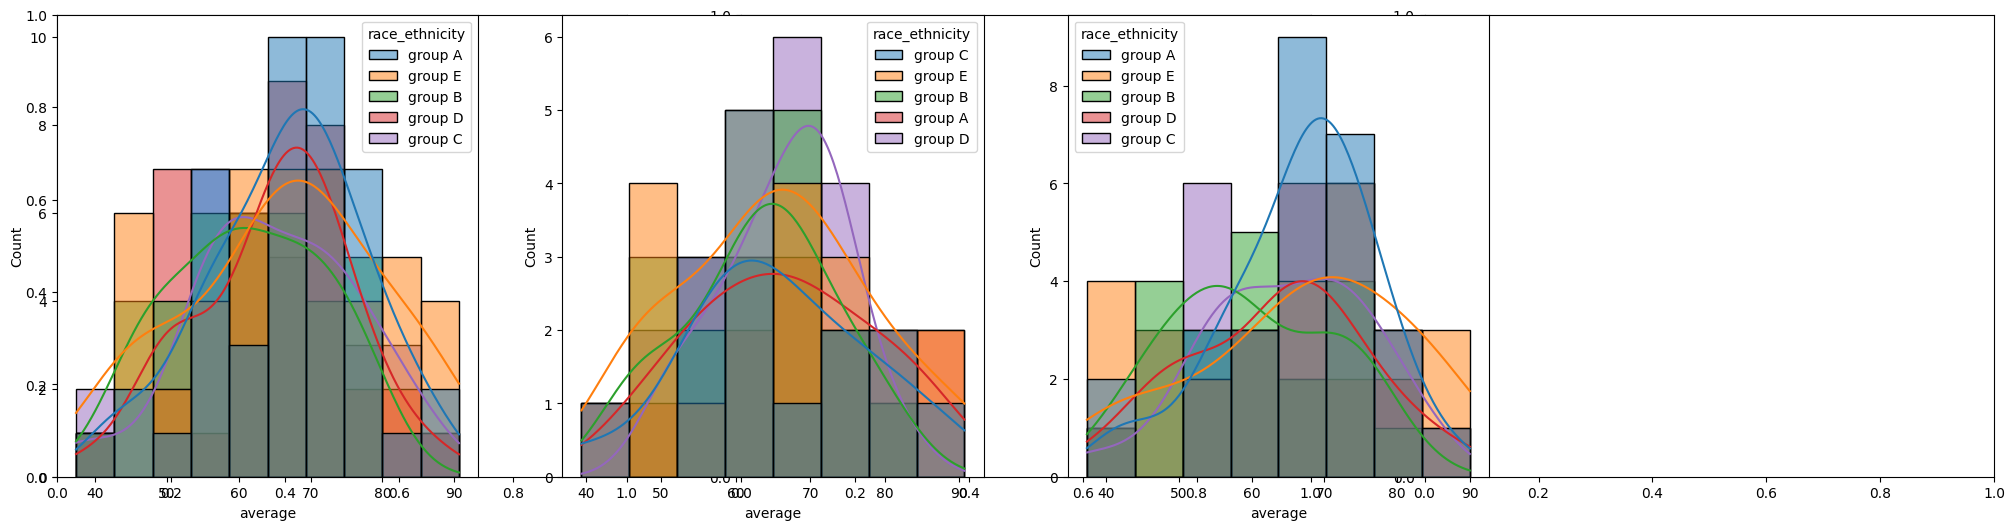

In [64]:
plt.subplots(1, 3, figsize=(25, 6))

plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

plt.subplot(142)
ax = sns.histplot(data=df[df['gender'] == 'female'], x='average', kde=True, hue='race_ethnicity')

plt.subplot(143)
ax = sns.histplot(data=df[df['gender'] == 'male'], x='average', kde=True, hue='race_ethnicity')

plt.show()


Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

### 4.2 Maximumum score of students in all three subjects

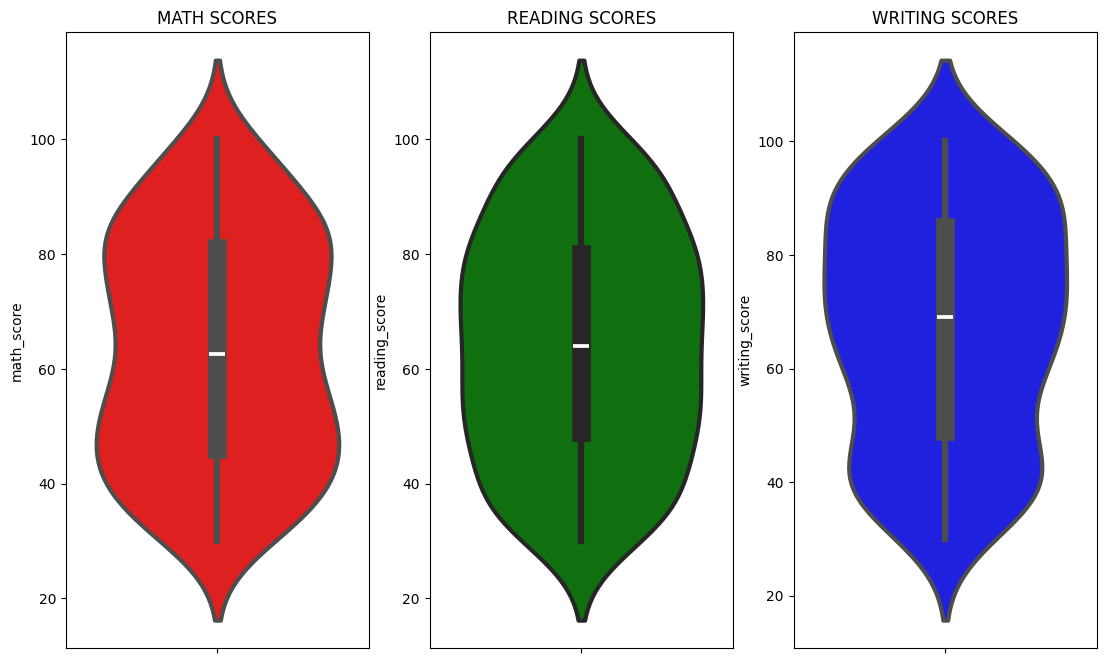

In [66]:
plt.figure(figsize=(18, 8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)

plt.show()


### 4.3 Multivariate analysis using pieplot

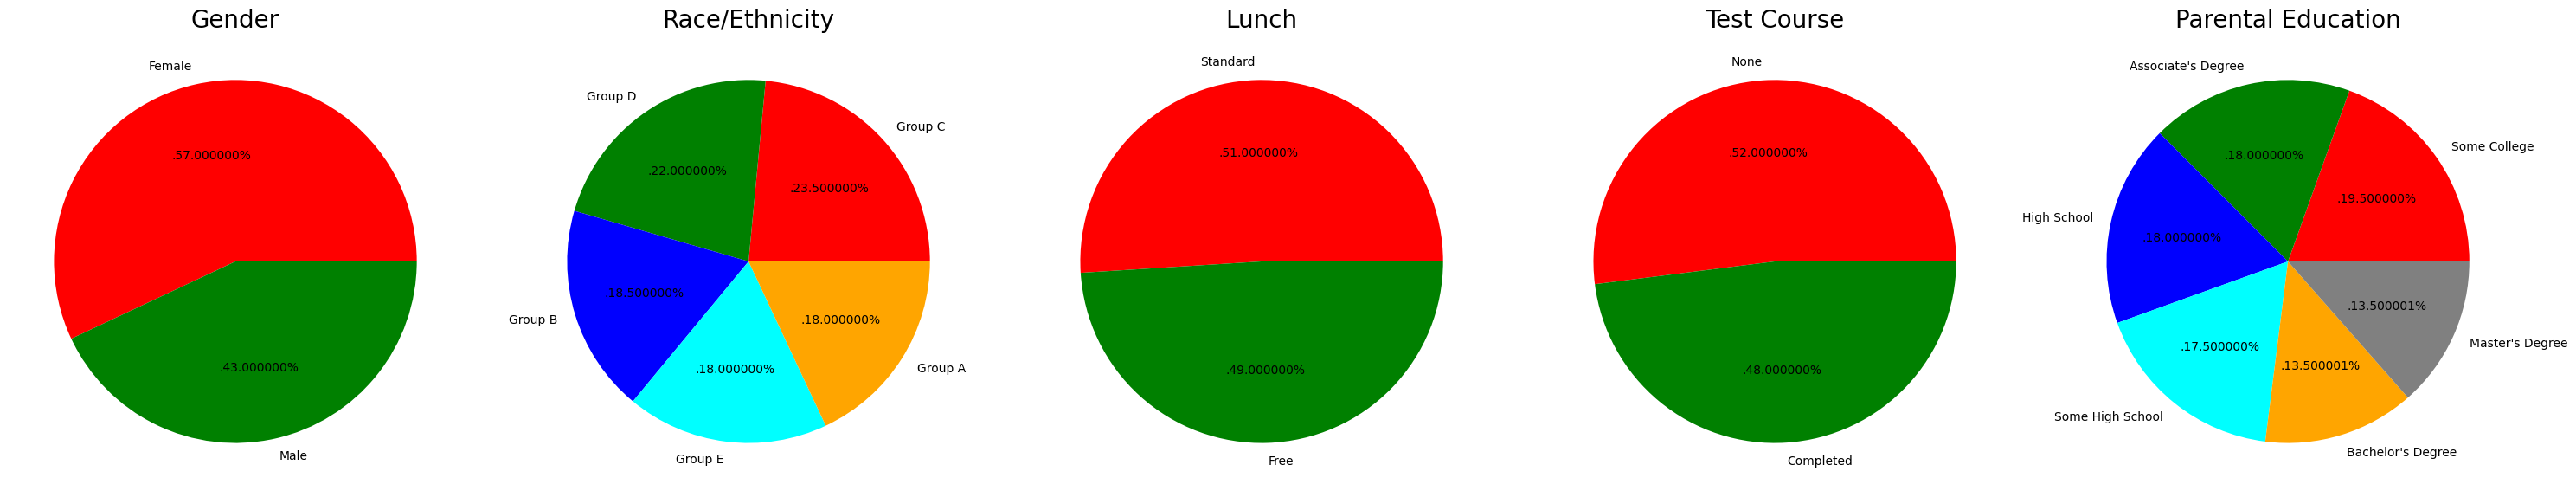

In [68]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()  # Corrected column name
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_prep_course'].value_counts()  # Corrected column name
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()


Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 Feature Wise Visualization
### 4.4.1 GENDER COLUMN
How is distribution of Gender ?
Is gender has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

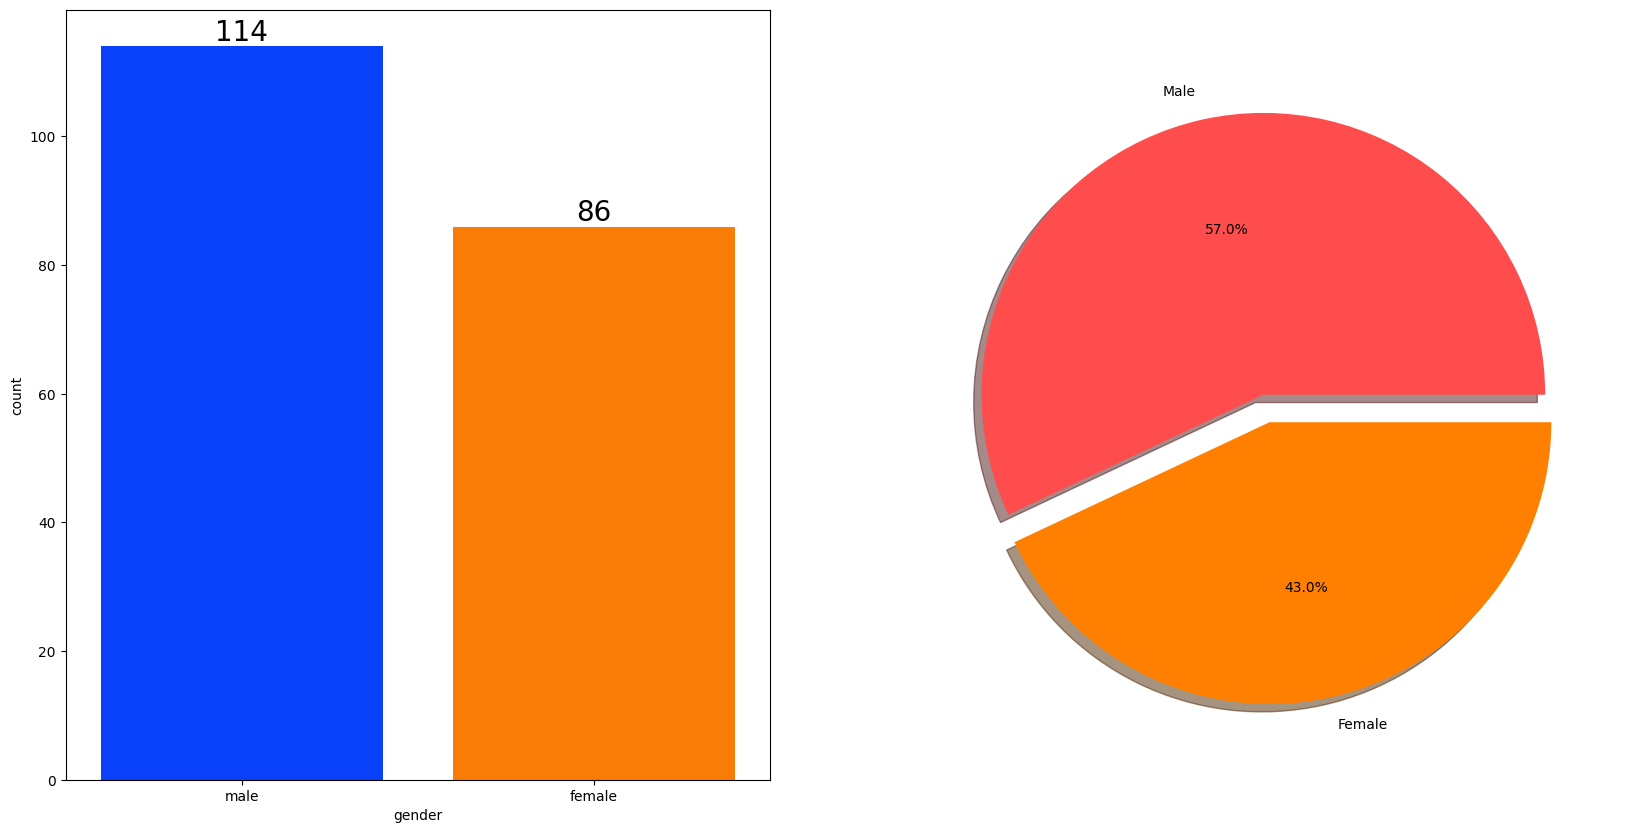

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [77]:
# Select only numeric columns and then calculate the mean by gender
numeric_columns = df.select_dtypes(include='number')  # Select numeric columns
gender_group = numeric_columns.groupby(df['gender']).mean()

# Display the result
print("Average scores grouped by gender:")
print(gender_group)


Average scores grouped by gender:
        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.302326      64.627907      68.267442   196.197674  65.399225
male     63.307018      63.771930      66.824561   193.903509  64.634503


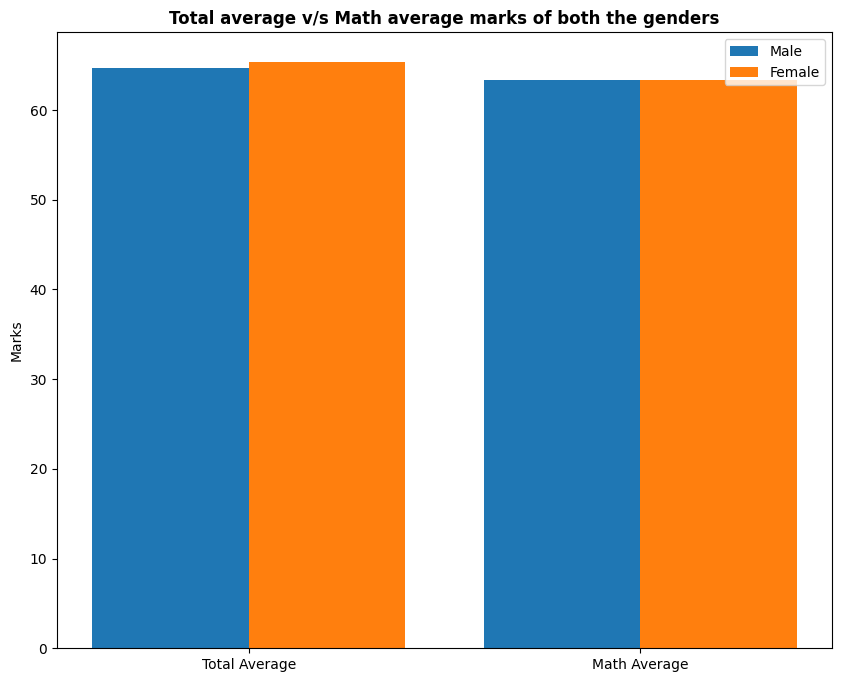

In [78]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Extracting the scores for each gender
female_scores = [gender_group['average']['female'], gender_group['math_score']['female']]
male_scores = [gender_group['average']['male'], gender_group['math_score']['male']]

X_axis = np.arange(len(X))

# Plotting the data
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')

# Labeling the plot
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


### 4.4.2 RACE ETHNICITY COLUMN
How is Group wise distribution ?
Is Race/Ehnicity has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

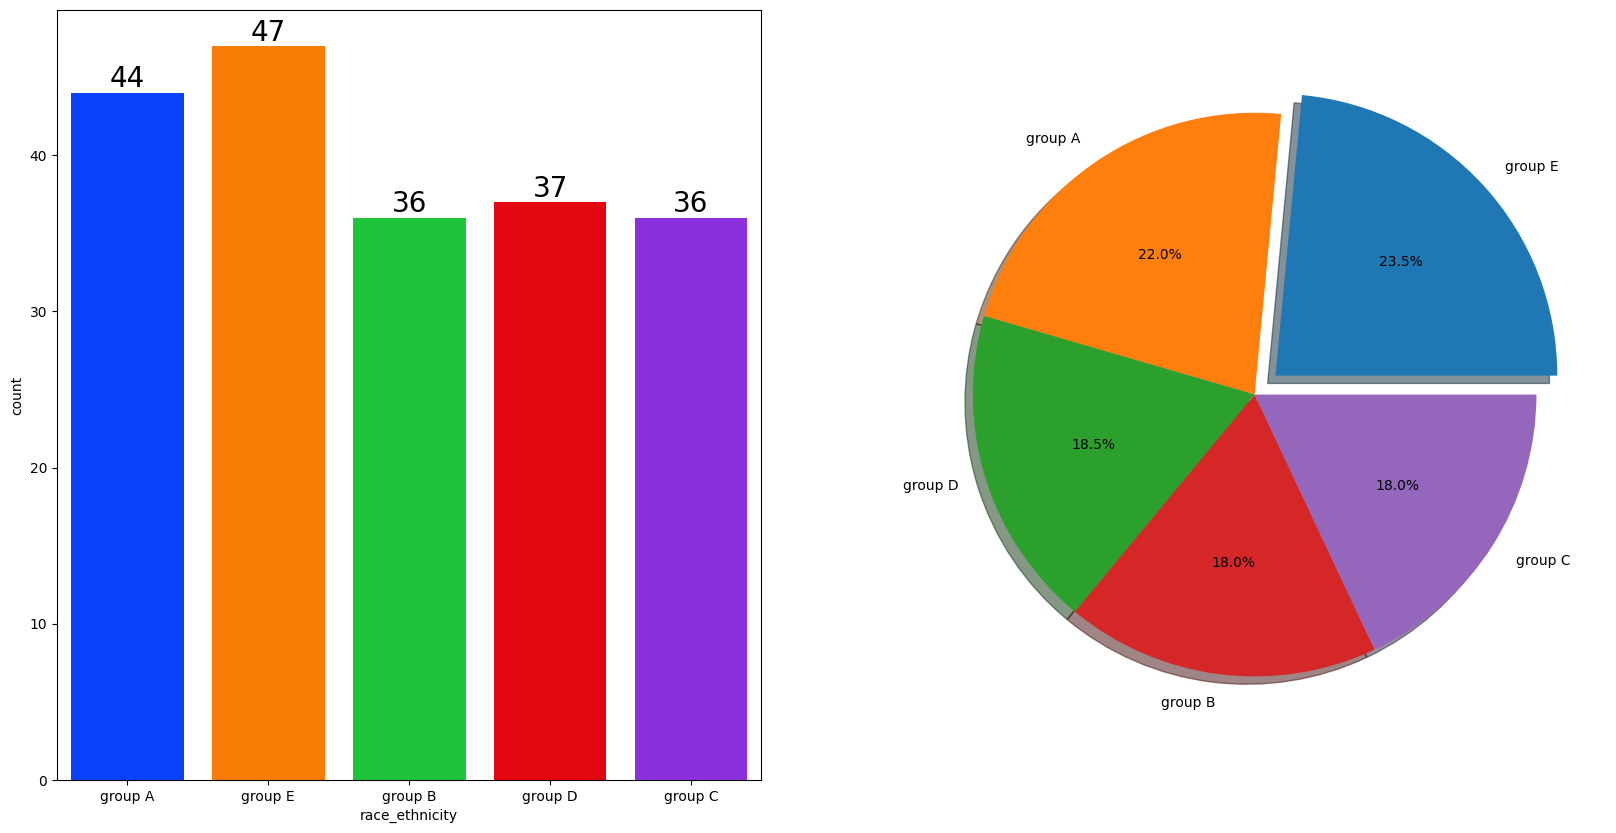

In [83]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot on the first subplot
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
# Pie chart
plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, 
        explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)

plt.show()


### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

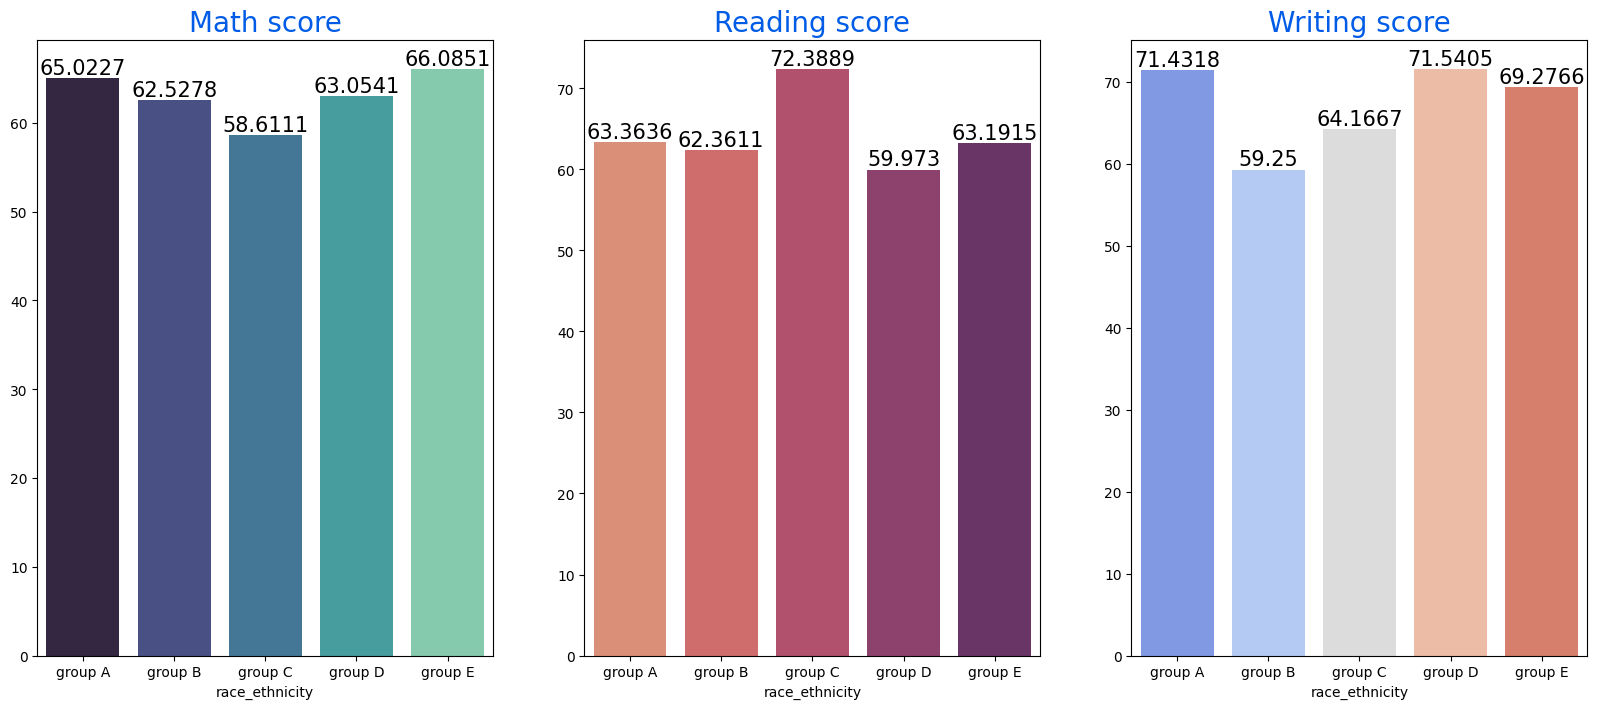

In [85]:
Group_data2 = df.groupby('race_ethnicity')

f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math score plot
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading score plot
sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing score plot
sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

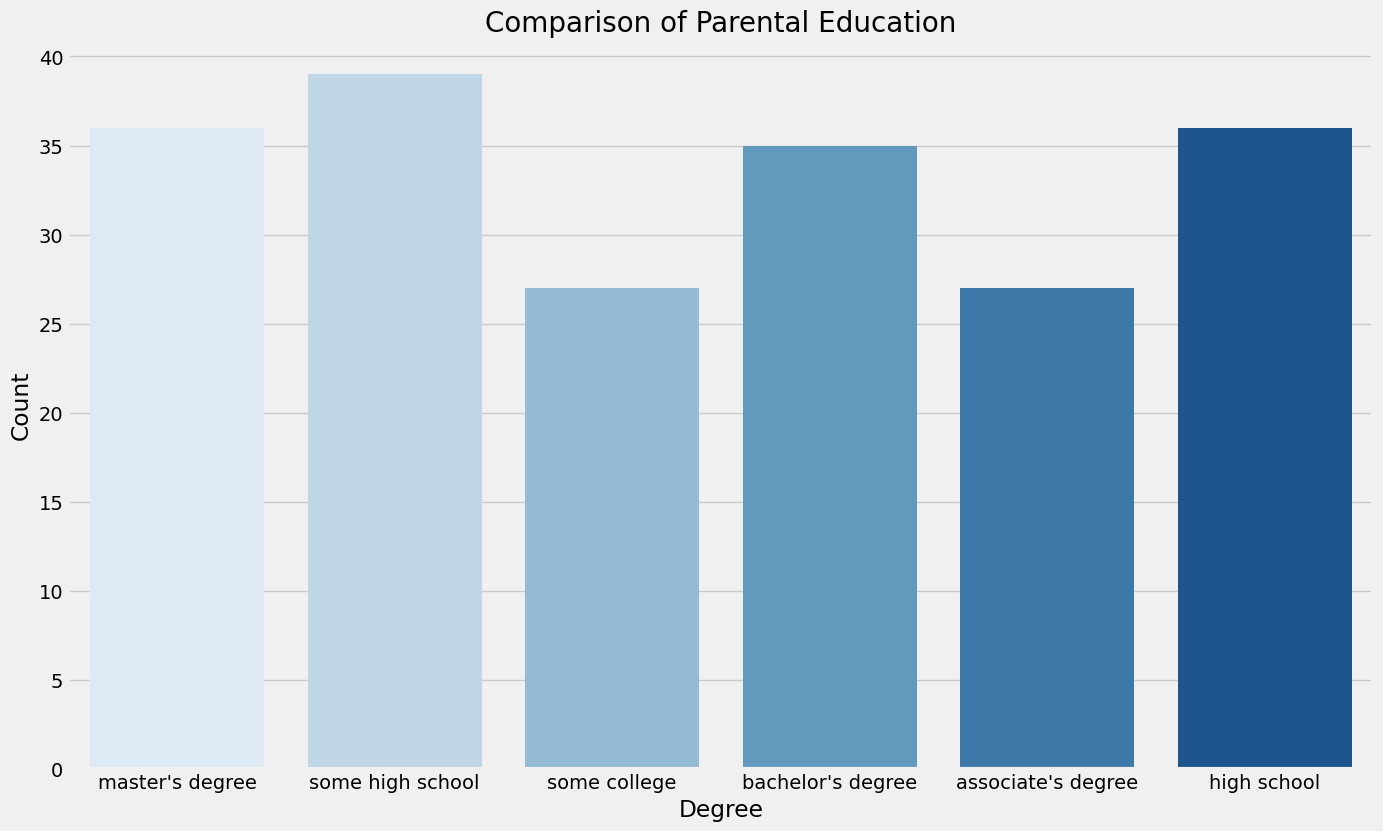

In [89]:
# Check if the column exists and handle any missing data
if 'parental_level_of_education' in df.columns:
    plt.rcParams['figure.figsize'] = (15, 9)
    plt.style.use('fivethirtyeight')

    # Countplot for 'parental_level_of_education'
    sns.countplot(x='parental_level_of_education', data=df, palette='Blues')
    plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
    plt.xlabel('Degree')
    plt.ylabel('Count')
    plt.show()
else:
    print("The column 'parental_level_of_education' does not exist.")


Insights
- Largest number of parents are from some high school.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

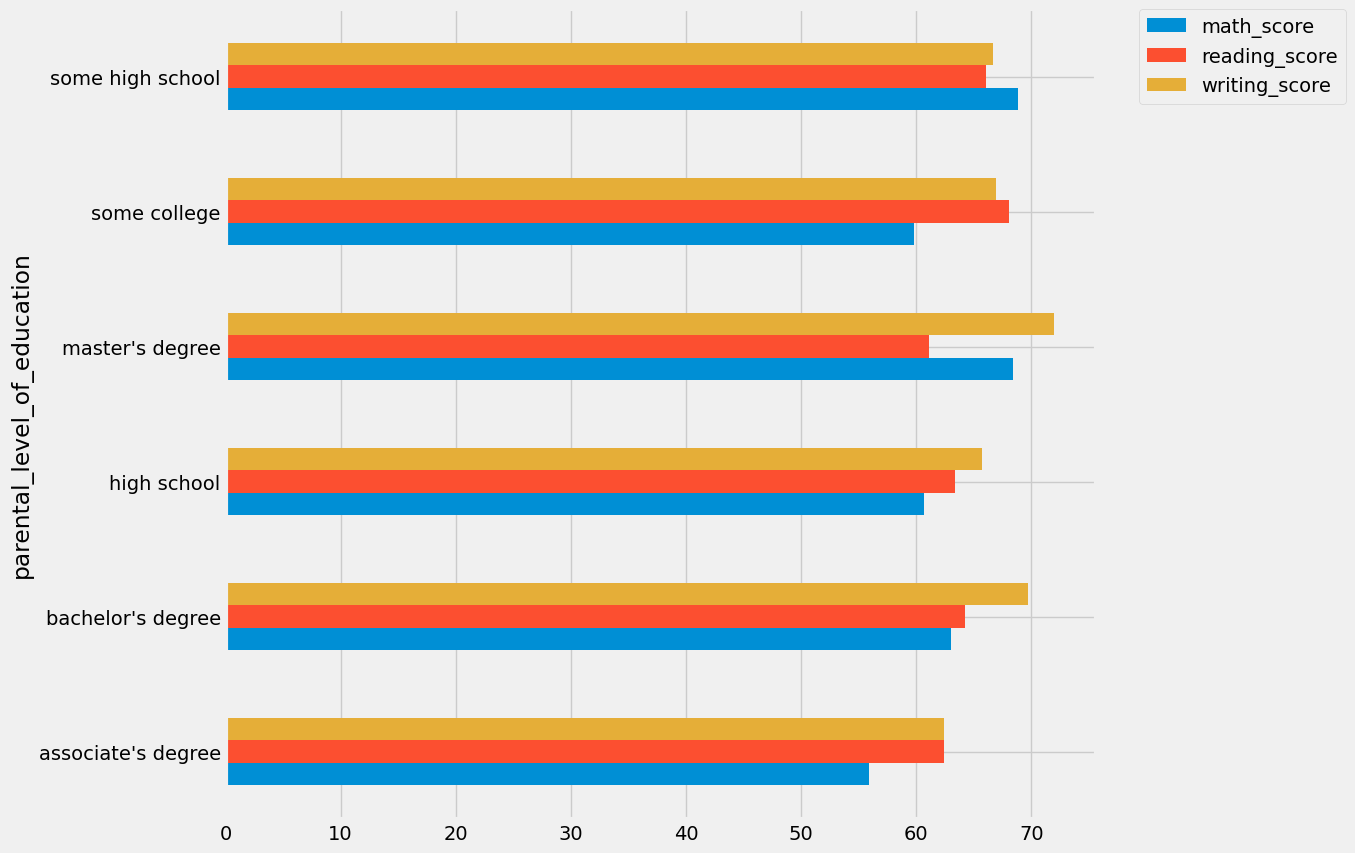

In [94]:
# Select only numeric columns
numeric_columns = ['math_score', 'reading_score', 'writing_score']

# Group by 'parental level of education' and calculate the mean of numeric columns
df.groupby('parental_level_of_education')[numeric_columns].mean().plot(kind='barh', figsize=(10, 10))

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Show plot
plt.show()


### 4.4.4 LUNCH COLUMN
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

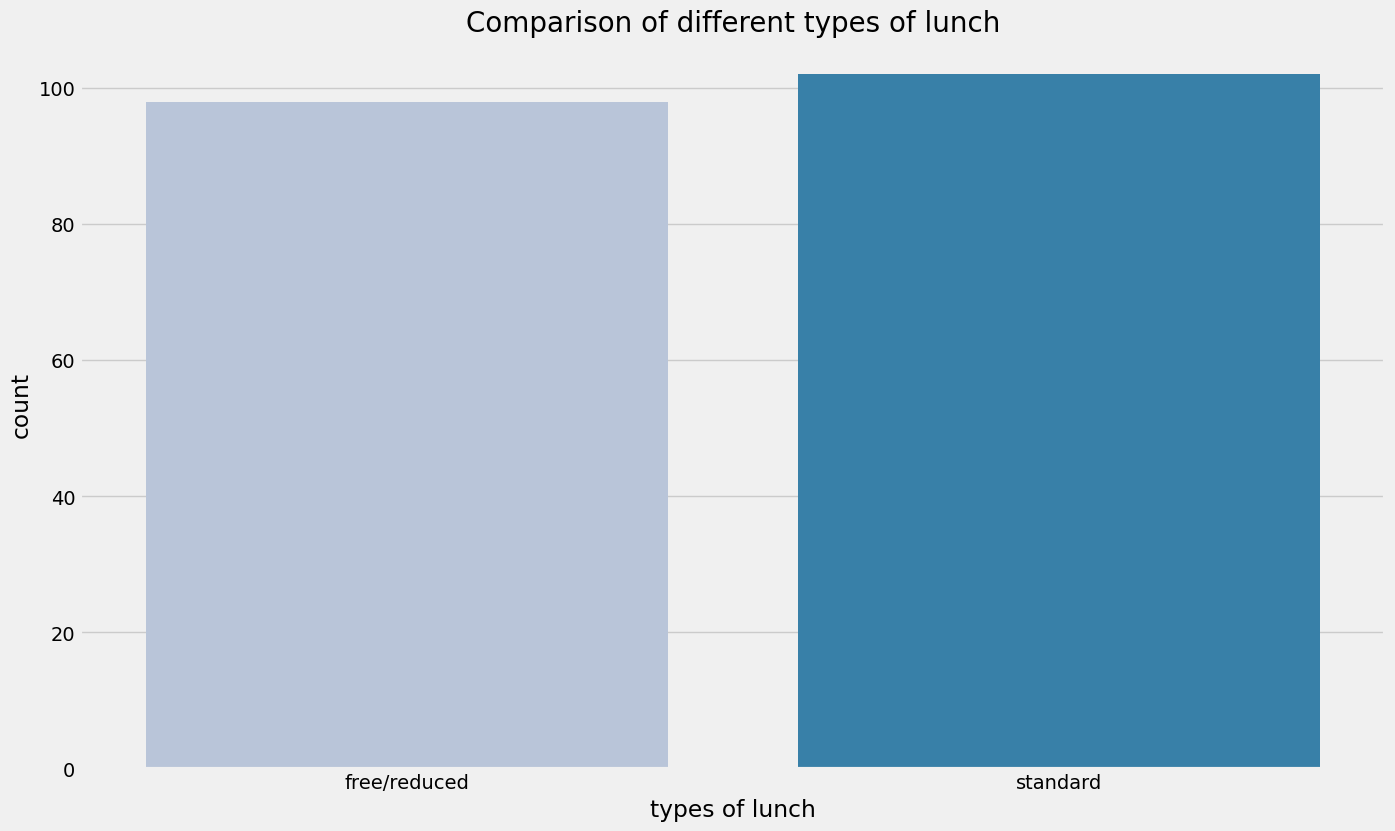

In [98]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')  # Remove this line or replace it with a valid style
sns.countplot(x='lunch', data=df, palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


Insights
- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score',
       'total score', 'average'],
      dtype='object')


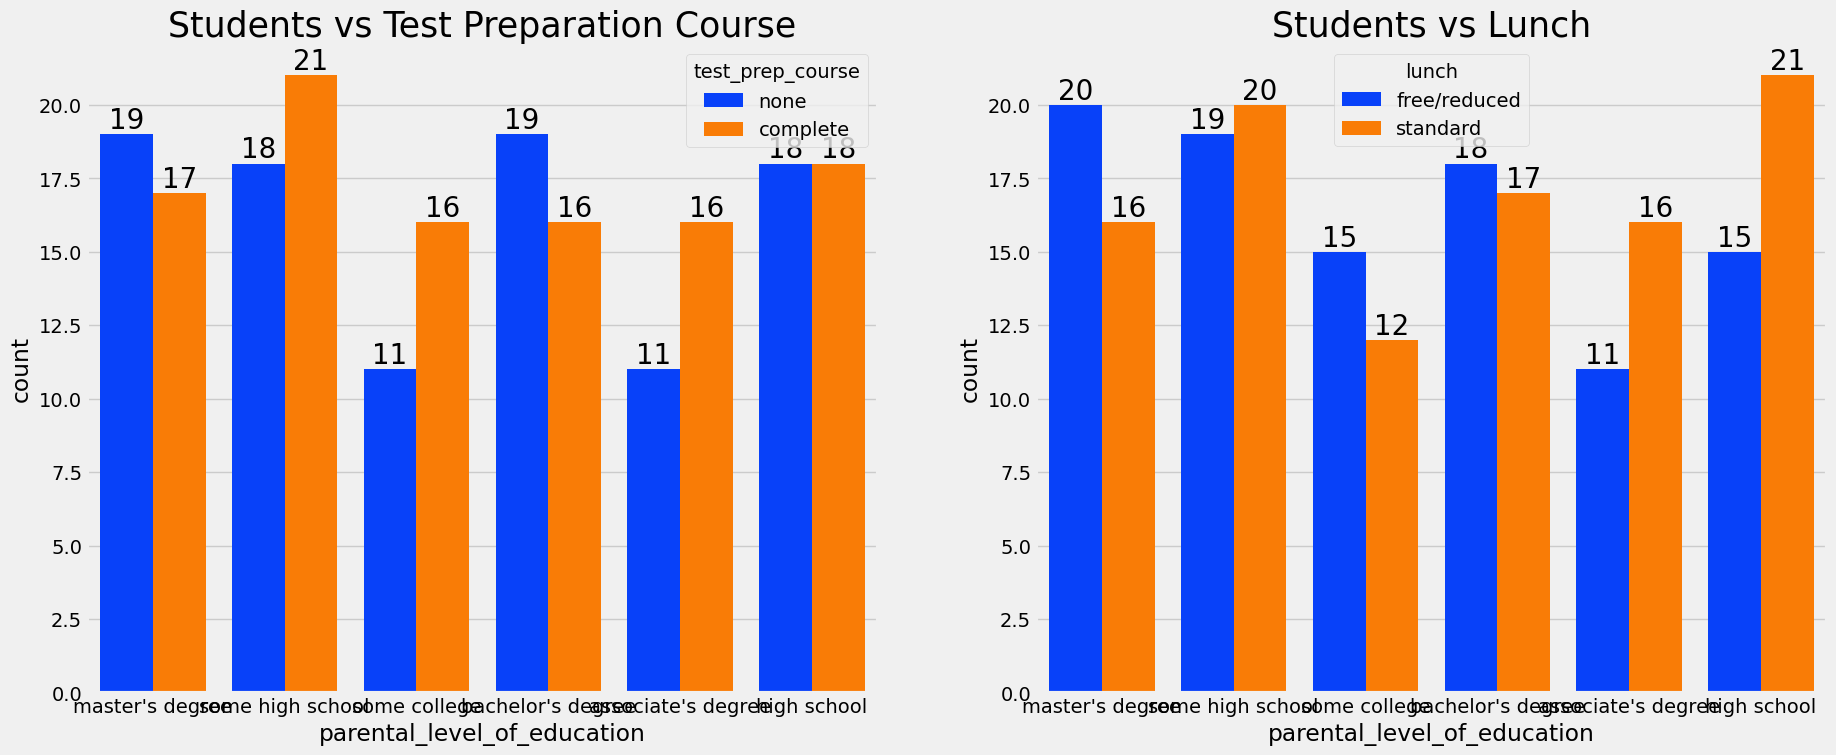

In [105]:
# Strip any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Print column names to confirm
print(df.columns)

# Now, let's recreate the plots with the corrected column names
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First plot: Students vs test preparation course
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='test_prep_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second plot: Students vs lunch
sns.countplot(x='parental_level_of_education', data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch', color='black', size=25)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.show()


### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_prep_course', 'math_score', 'reading_score', 'writing_score',
       'total score', 'average'],
      dtype='object')


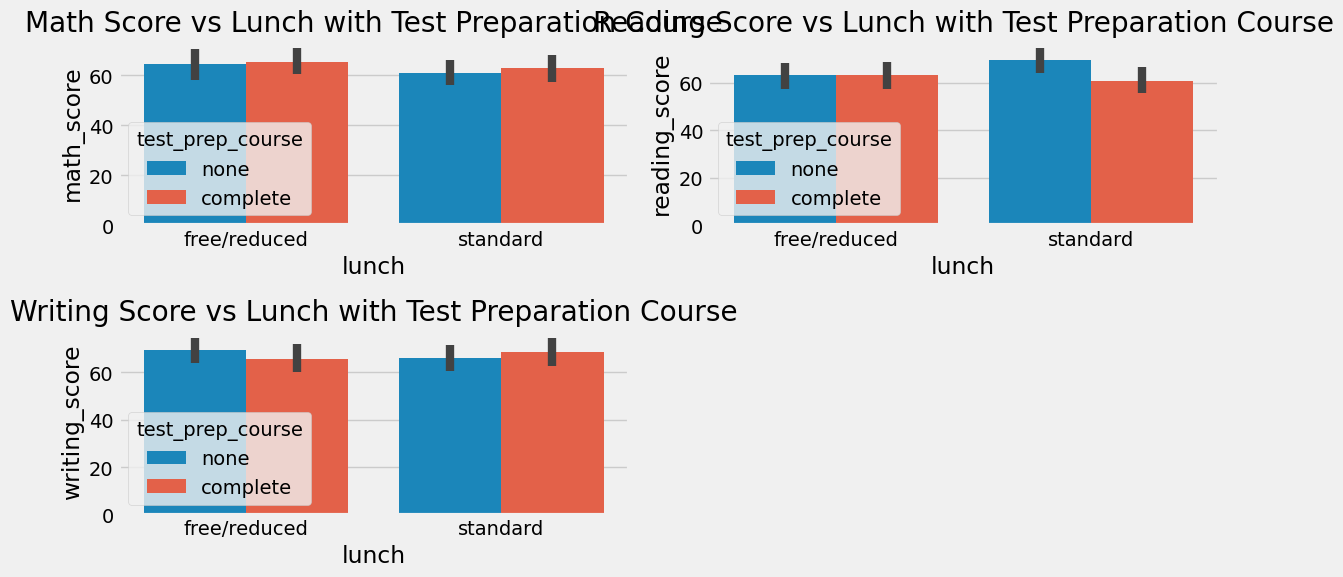

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names in your dataset to avoid any errors
print(df.columns)

plt.figure(figsize=(12, 6))

# First plot: Math score vs. Lunch with hue as test prep course
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_prep_course', data=df)
plt.title('Math Score vs Lunch with Test Preparation Course')

# Second plot: Reading score vs. Lunch with hue as test prep course
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_prep_course', data=df)
plt.title('Reading Score vs Lunch with Test Preparation Course')

# Third plot: Writing score vs. Lunch with hue as test prep course
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_prep_course', data=df)
plt.title('Writing Score vs Lunch with Test Preparation Course')

plt.tight_layout()  # Adjust layout for better visibility
plt.show()


### 4.4.6 CHECKING OUTLIERS

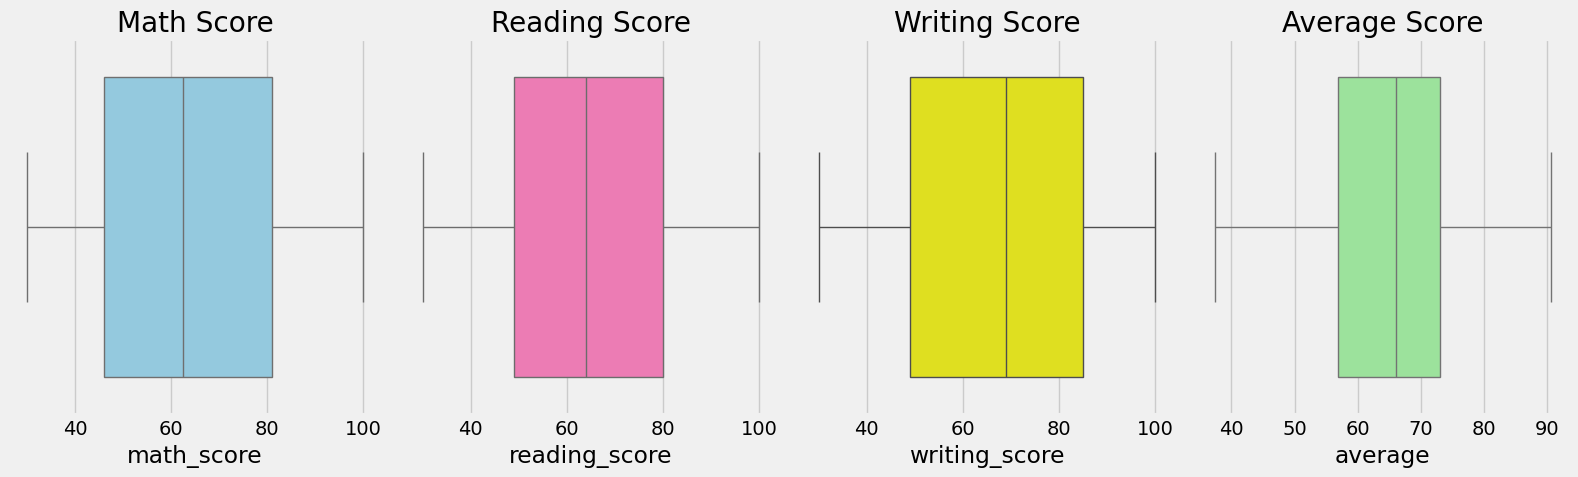

In [109]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Now calculate the 'average' column
df['average'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Create the subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# First plot: Math score boxplot
sns.boxplot(ax=axes[0], x=df['math_score'], color='skyblue')
axes[0].set_title('Math Score')

# Second plot: Reading score boxplot
sns.boxplot(ax=axes[1], x=df['reading_score'], color='hotpink')
axes[1].set_title('Reading Score')

# Third plot: Writing score boxplot
sns.boxplot(ax=axes[2], x=df['writing_score'], color='yellow')
axes[2].set_title('Writing Score')

# Fourth plot: Average score boxplot
sns.boxplot(ax=axes[3], x=df['average'], color='lightgreen')
axes[3].set_title('Average Score')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

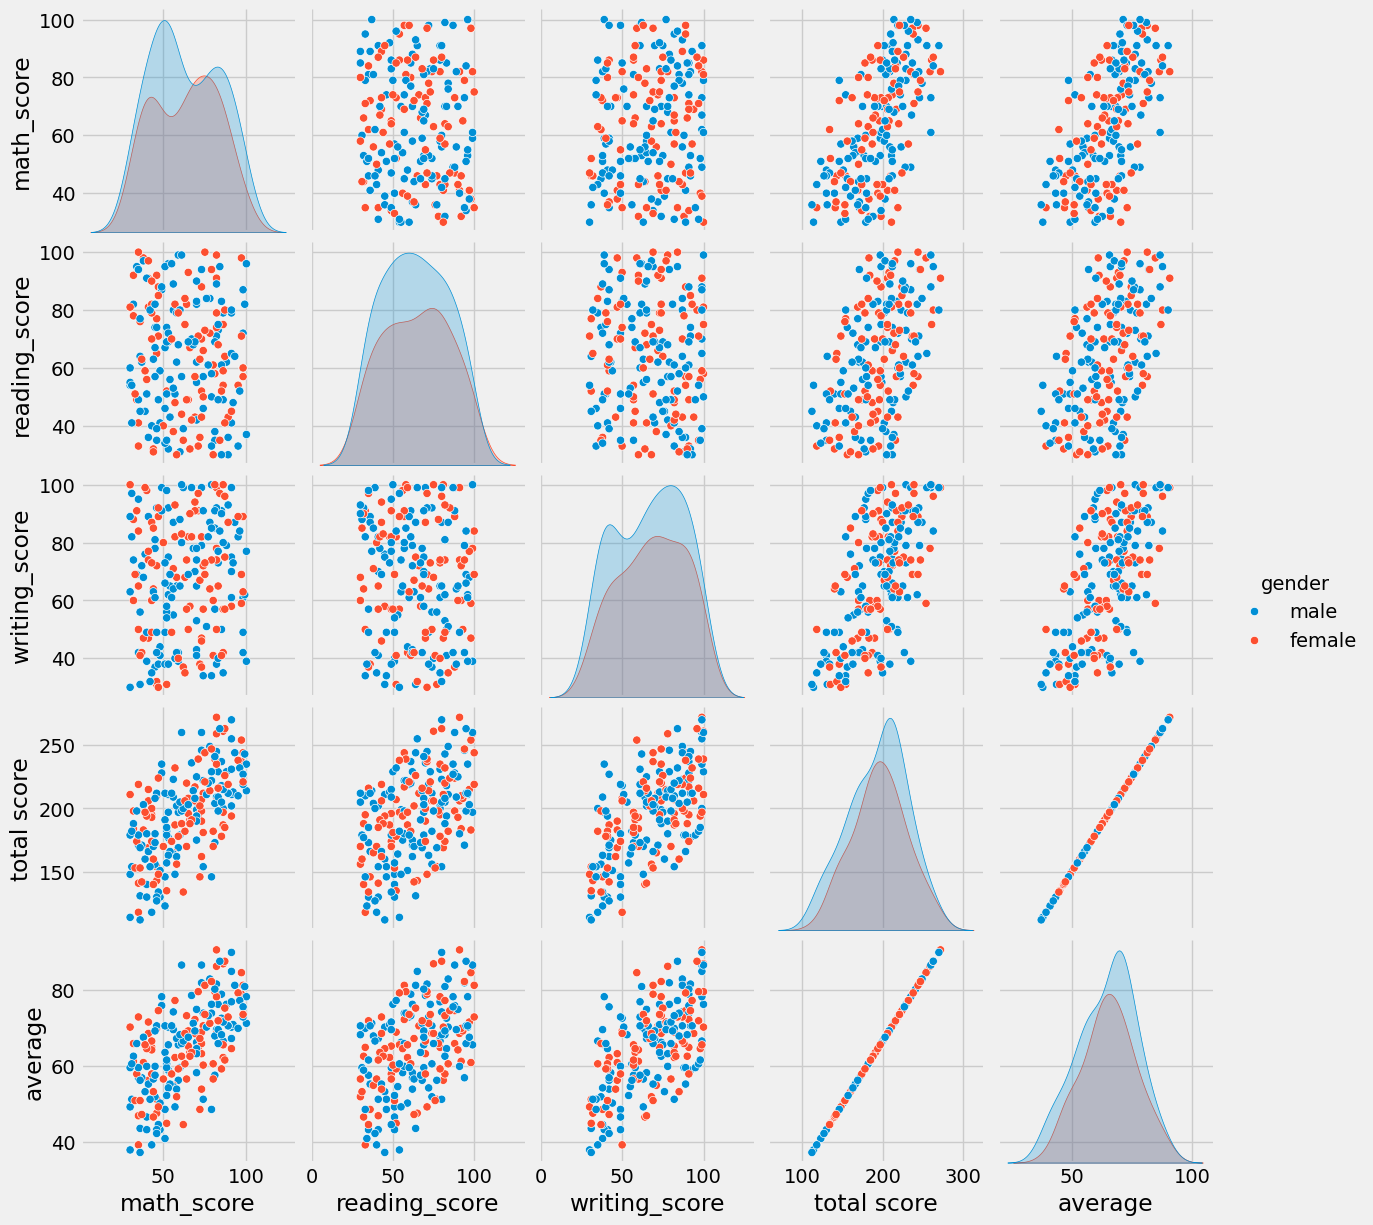

In [110]:
sns.pairplot(df,hue = 'gender')
plt.show()


## 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.